# Acquire and Prep

In the following lessons, we will walk through the data science pipeline using the following example:

I am a university teacher, and I want to know when to worry about a student's progress.  I want to be able to work with any students who are a high risk of failing the class, so that I can try to prevent that from happening.  I have the grades of the three exams and the final grade from last semester's class.  I am hoping I can build a prediction model that would be able to use those exams to predict the final grade +/- 5 points per student.

### Acquire the Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

In [2]:
df = pd.read_csv("data/student_grades.csv")

### Sample and summarize

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [4]:
df.shape

(104, 5)

In [5]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


Takeaways:

- exam1 has 1 null value (RangeIndex-exam1)
- exam1 should likely be of type int64 once the null value is addressed
- there is likely an odd value in exam3, as it should be of type int64 but was read in as an object. We need to find that value.
- given that there are limited attributes and limited observations with missing values, dropping the observations with missing values is probably a good way to go here. 

Other ways to find null values, when you are dealing with a larger dataframe, especially one with more attributes and more missing values:

In [7]:
print(df.isnull().sum())

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64


In [8]:
print(df.columns[df.isnull().any()])

Index(['exam1'], dtype='object')


Find the odd value in exam3:

In [9]:
df.exam3.value_counts(sort=True, ascending=True)

       1
94     8
87     8
79     8
95     8
70     8
86     8
85     8
75    15
96    16
78    16
Name: exam3, dtype: int64

In [10]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

Verify that our empty string has been replaced by a null

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          103 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


- drop all observations with missing values
- update the data types to int

In [12]:
df = df.dropna().astype('int')

You may want to fill your missing values with a value instead of dropping the rows. One way to do that is to apply the method fillna() to your dataframe. 
`df.fillna()`

When running `describe()`, we should now see exam3 listed since we have converted it to a numeric type.

In [13]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


### Visualize Distribution

Plot histograms &/or boxplots to see the distribution, skewness, outliers, and unit scales.

#### matplotlib.pyplot

Here we'll loop through each of the numeric columns of interest, and show the distribution of each on a separate subplot.

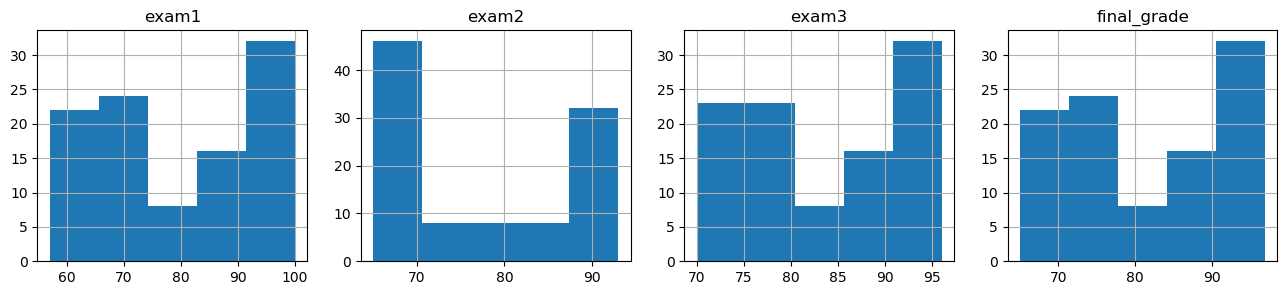

In [14]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

#### seaborn.boxplot

seaborn.boxplot will default to plotting *all* the numeric variables if we don't specify specific x and y values. 

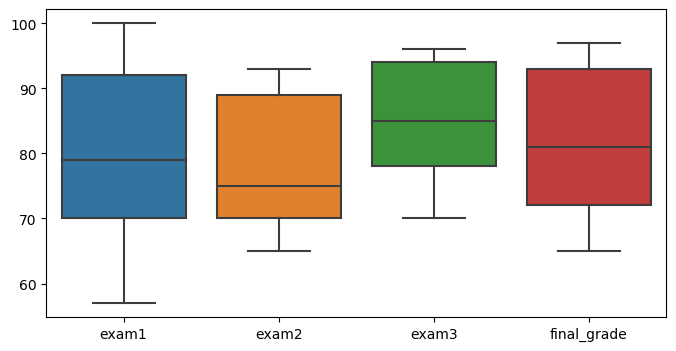

In [15]:
# we don't want to plot the `student_id` column.
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

### Pipeline Function

We finalize these steps (acquire & prep) by writing a function that will reproduce the dataframe with the necessary changes.

In [16]:
def wrangle_grades():
    grades = pd.read_csv("data/student_grades.csv")
    grades.drop(columns='student_id', inplace=True)
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

## Exercises:

1. Create a directory named `regression-exercises` within your `codeup-data-science` directory.
1. Initialize this directory as a git repository.
1. Ceate a `README.md` file that outlines the contents.
1. Create a repository on github with the same name (`regression-exercises`) and link your local repo to the remote.
1. Add, commit, and push the readme file.
1. The filename for this exercise is `wrangle.py`.
1. As always, add, commit, and push your work.
---

Throughout the exercises for Regression in Python lessons, you will use the following example scenario:
As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer. 

The first step will be to acquire and prep the data. Do your work for this exercise in a file named `wrangle.py`. 

1. Acquire customer_id, monthly_charges, tenure, and total_charges from `telco_churn` database for all customers with a 2 year contract.
2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate. 
3. End with a python file wrangle.py that contains the function, `wrangle_telco()`, that will acquire the data and return a dataframe cleaned with no missing values.